In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
avocado = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# exploring data

In [3]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# data pre processing

In [4]:
avocado_ts = avocado[['Date','AveragePrice']]

In [5]:
avocado_ts.sort_values('Date')

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [6]:
avocado_ts.columns = ['ds','y']

# TSF

In [7]:
!pip install prophet

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()

In [10]:
m.fit(avocado_ts)

02:45:58 - cmdstanpy - INFO - Chain [1] start processing
02:46:02 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [12]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497733,0.907248,1.871566,1.497733,1.497733,-0.113797,-0.113797,-0.113797,-0.113797,-0.113797,-0.113797,0.0,0.0,0.0,1.383936
1,2015-01-11,1.492614,0.895526,1.865452,1.492614,1.492614,-0.105256,-0.105256,-0.105256,-0.105256,-0.105256,-0.105256,0.0,0.0,0.0,1.387358
2,2015-01-18,1.487495,0.878412,1.827481,1.487495,1.487495,-0.104847,-0.104847,-0.104847,-0.104847,-0.104847,-0.104847,0.0,0.0,0.0,1.382648
3,2015-01-25,1.482376,0.866350,1.862365,1.482376,1.482376,-0.123698,-0.123698,-0.123698,-0.123698,-0.123698,-0.123698,0.0,0.0,0.0,1.358678
4,2015-02-01,1.477258,0.825425,1.823018,1.477258,1.477258,-0.151909,-0.151909,-0.151909,-0.151909,-0.151909,-0.151909,0.0,0.0,0.0,1.325348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.155515,0.554596,1.567252,0.940975,1.334339,-0.085365,-0.085365,-0.085365,-0.085365,-0.085365,-0.085365,0.0,0.0,0.0,1.070150
530,2019-03-22,1.154770,0.562869,1.584310,0.939341,1.334205,-0.083680,-0.083680,-0.083680,-0.083680,-0.083680,-0.083680,0.0,0.0,0.0,1.071090
531,2019-03-23,1.154024,0.540726,1.556044,0.937737,1.334071,-0.081722,-0.081722,-0.081722,-0.081722,-0.081722,-0.081722,0.0,0.0,0.0,1.072302
532,2019-03-24,1.153279,0.516985,1.564239,0.936073,1.333936,-0.079511,-0.079511,-0.079511,-0.079511,-0.079511,-0.079511,0.0,0.0,0.0,1.073768


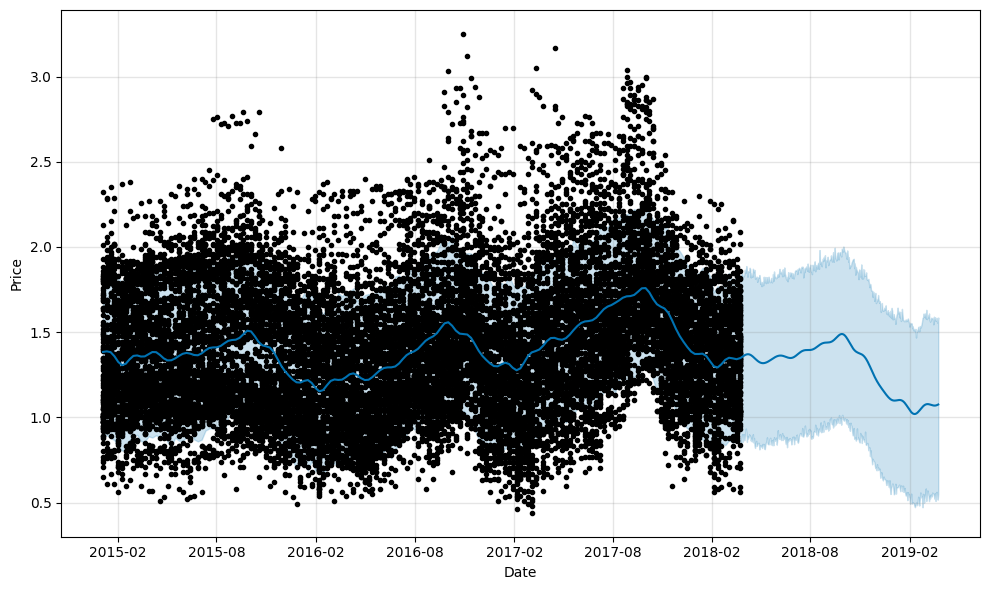

In [13]:
forecast_figure=m.plot(forecast , xlabel='Date', ylabel='Price')

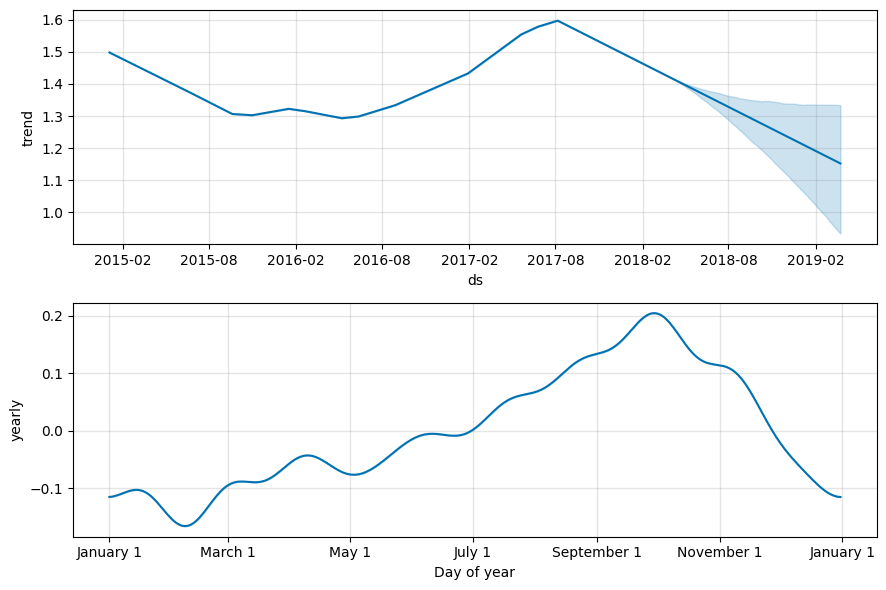

In [14]:
figure_component = m.plot_components(forecast)